<a href="https://colab.research.google.com/github/ThunchanokChai/DPDM2023/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/OGDataset.csv')

In [ ]:
dataset.head()

,No,Mortality_30days,Age,Sex,BMI,Fever,Cough,Diarrhea,Rhinrrhea,Myalgia,...,CumuD_4_balance,Prone,ECMO,PaO2/FiO2,EarlyECMO,Flu_A,Flu_B,ICUwait(day),1st dose Tamiflu,Rapid_test
0,1,0,36,1,28.1,0,1,0,0,0,...,-8778.0,1,0,81.3,0,1,0,1.6,0.00,1
1,2,0,64,0,25.7,1,1,0,0,0,...,1345.0,1,0,126.8,0,1,0,0.1,0.05,0
2,3,1,64,0,25.3,1,1,0,1,1,...,806.0,1,0,97.4,0,0,0,0.9,0.00,0
3,4,0,56,1,21.4,1,1,0,0,0,...,2532.0,0,0,203.8,0,1,0,0.0,1.81,0
4,5,0,78,1,33.9,1,1,0,0,0,...,91.0,0,0,404.0,0,1,0,0.0,0.85,1


#Check Missing Value

In [ ]:
dataset.isnull().any() # มีตัวแปรบางตัวมีค่า missing

No                  False
Mortality_30days    False
Age                 False
Sex                 False
BMI                  True
                    ...  
Flu_A               False
Flu_B               False
ICUwait(day)         True
1st dose Tamiflu     True
Rapid_test          False
Length: 77, dtype: bool

In [ ]:
dataset_new = dataset.fillna(dataset.mean()) #แทน missing value ด้วย mean

In [ ]:
dataset_new.isnull().any() #check ค่า missing อีกรอบ

No                  False
Mortality_30days    False
Age                 False
Sex                 False
BMI                 False
                    ...  
Flu_A               False
Flu_B               False
ICUwait(day)        False
1st dose Tamiflu    False
Rapid_test          False
Length: 77, dtype: bool

In [ ]:
dataset_new #จะได dataset ที่มี 336 rows 77 column

,No,Mortality_30days,Age,Sex,BMI,Fever,Cough,Diarrhea,Rhinrrhea,Myalgia,...,CumuD_4_balance,Prone,ECMO,PaO2/FiO2,EarlyECMO,Flu_A,Flu_B,ICUwait(day),1st dose Tamiflu,Rapid_test
0,1,0,36,1,28.1,0,1,0,0,0,...,-8778.000000,1,0,81.300000,0,1,0,1.600000,0.00,1
1,2,0,64,0,25.7,1,1,0,0,0,...,1345.000000,1,0,126.800000,0,1,0,0.100000,0.05,0
2,3,1,64,0,25.3,1,1,0,1,1,...,806.000000,1,0,97.400000,0,0,0,0.900000,0.00,0
3,4,0,56,1,21.4,1,1,0,0,0,...,2532.000000,0,0,203.800000,0,1,0,0.000000,1.81,0
4,5,0,78,1,33.9,1,1,0,0,0,...,91.000000,0,0,404.000000,0,1,0,0.000000,0.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,0,67,1,27.4,0,1,0,0,0,...,1025.000000,0,0,187.600000,0,1,0,0.600000,0.00,1
332,333,1,44,1,27.3,0,1,0,0,0,...,1864.737061,0,0,58.900000,0,1,0,0.300000,0.20,1
333,334,0,81,1,23.0,1,1,0,0,0,...,-95.000000,0,0,130.377483,0,1,0,1.008224,0.00,1
334,335,1,91,1,19.5,0,1,0,0,0,...,2240.000000,0,0,130.377483,0,1,0,0.000000,1.80,1


#Split datat

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#เลือกcolumnsว่าตัวแปรไหนเป็น x ตัวไหนเป็น y
x = dataset_new.iloc[:,2:]
x.head()

,Age,Sex,BMI,Fever,Cough,Diarrhea,Rhinrrhea,Myalgia,Headache,SOB,...,CumuD_4_balance,Prone,ECMO,PaO2/FiO2,EarlyECMO,Flu_A,Flu_B,ICUwait(day),1st dose Tamiflu,Rapid_test
0,36,1,28.1,0,1,0,0,0,0,1,...,-8778.0,1,0,81.3,0,1,0,1.6,0.00,1
1,64,0,25.7,1,1,0,0,0,0,1,...,1345.0,1,0,126.8,0,1,0,0.1,0.05,0
2,64,0,25.3,1,1,0,1,1,0,1,...,806.0,1,0,97.4,0,0,0,0.9,0.00,0
3,56,1,21.4,1,1,0,0,0,0,1,...,2532.0,0,0,203.8,0,1,0,0.0,1.81,0
4,78,1,33.9,1,1,0,0,0,0,1,...,91.0,0,0,404.0,0,1,0,0.0,0.85,1


In [ ]:
y = dataset_new.iloc[:,1]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Mortality_30days, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) #แบ่ง data เป็น train และ test

#Model

##Extreme gradient boosing (XGBoost)

In [ ]:
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
xgb_model = xgb.XGBClassifier(scale_pos_weight=263/73,learning_rate=0.007,
                              n_estimators=100,gamma=0,max_depth=4,
                              min_child_weight=2,subsample=1,eval_metric='error')

###Train model

In [ ]:
xgb_model.fit(x_train.to_numpy(),y_train.to_numpy())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.007, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###Test model

In [ ]:
y_pred_XG = xgb_model.predict_proba(x_test)[:,1] #ความน่าจะเป็นที่จะพยากรณ์ได้ 1

In [ ]:
y_pred_XG

array([0.66368616, 0.32363907, 0.6873318 , 0.2961131 , 0.3410311 ,
       0.2828428 , 0.43642333, 0.3961899 , 0.29534417, 0.59429985,
       0.31172457, 0.4431346 , 0.57054913, 0.40672323, 0.35873765,
       0.37269226, 0.4993923 , 0.6650166 , 0.3212556 , 0.3125091 ,
       0.5565324 , 0.34471324, 0.5895623 , 0.5939529 , 0.31462035,
       0.5807329 , 0.29260436, 0.4177066 , 0.29534417, 0.6873318 ,
       0.30293503, 0.34574375, 0.44190782, 0.37197316, 0.3388623 ,
       0.34818453, 0.59429985, 0.59992754, 0.42007068, 0.29043567,
       0.5230837 , 0.2834536 , 0.27127054, 0.3177182 , 0.28841358,
       0.3196799 , 0.2684457 , 0.606755  , 0.40527886, 0.34422836,
       0.33929408, 0.3079802 , 0.31855428, 0.606755  , 0.2707888 ,
       0.39214113, 0.29656702, 0.5895623 , 0.46200305, 0.62821275,
       0.32662347, 0.4111964 , 0.2712314 , 0.36651444, 0.41957915,
       0.5127071 , 0.36188665, 0.54956055], dtype=float32)

###Plot ROC

In [ ]:
fpr_XG,tpr_XG,threshold_XG = metrics.roc_curve(y_test,y_pred_XG)
roc_auc_XG = metrics.auc(fpr_XG,tpr_XG)

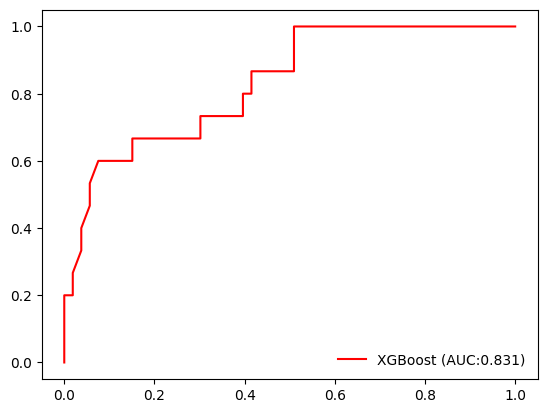

In [ ]:
plt.plot(fpr_XG,tpr_XG,'r',label='XGBoost (AUC:%0.3F)'%roc_auc_XG,linestyle='-')
plt.legend(loc='lower right',frameon=False)
plt.show()

##Random forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=4)

###Train

In [ ]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

###Test

In [ ]:
 y_pred_RF = rf_model.predict_proba(x_test)[:,1]

###ROC

In [ ]:
fpr_RF,tpr_RF,threshold_RF = metrics.roc_curve(y_test,y_pred_RF)
roc_auc_RF = metrics.auc(fpr_RF,tpr_RF)

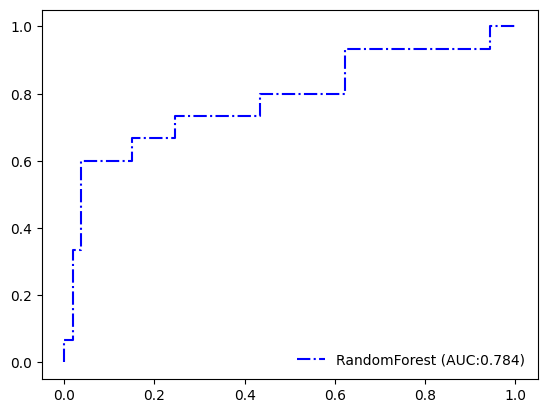

In [ ]:
plt.plot(fpr_RF,tpr_RF,'b',label='RandomForest (AUC:%0.3F)'%roc_auc_RF,linestyle='-.')
plt.legend(loc='lower right',frameon=False)
plt.show()

##Logistic regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(solver='lbfgs')

###Train

In [ ]:
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###Test

In [ ]:
 y_pred_LR = lr_model.predict_proba(x_test)[:,1]

###ROC

In [ ]:
fpr_LR,tpr_LR,threshold_LR = metrics.roc_curve(y_test,y_pred_LR)
roc_auc_LR = metrics.auc(fpr_LR,tpr_LR)

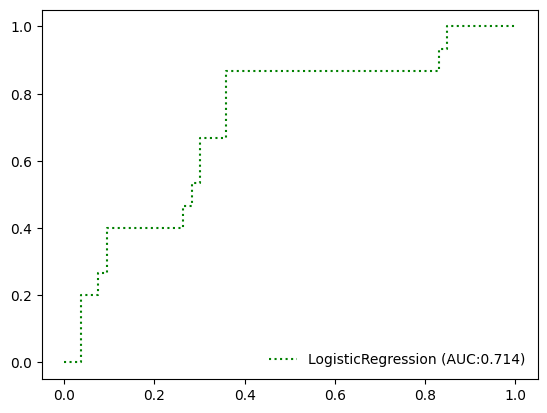

In [ ]:
plt.plot(fpr_LR,tpr_LR,'g',label='LogisticRegression (AUC:%0.3F)'%roc_auc_LR,linestyle=':')
plt.legend(loc='lower right',frameon=False)
plt.show()

##Plot ROC 3 Model

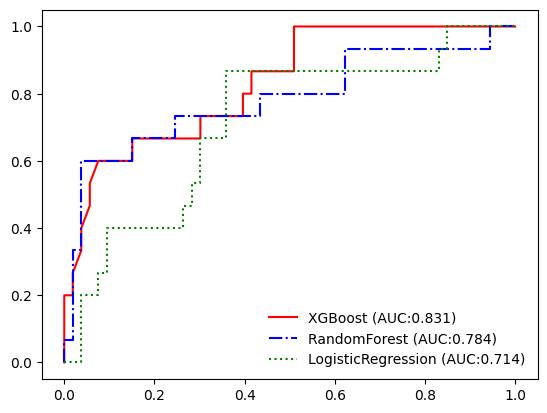

In [ ]:
plt.plot(fpr_XG,tpr_XG,'r',label='XGBoost (AUC:%0.3F)'%roc_auc_XG,linestyle='-')
plt.plot(fpr_RF,tpr_RF,'b',label='RandomForest (AUC:%0.3F)'%roc_auc_RF,linestyle='-.')
plt.plot(fpr_LR,tpr_LR,'g',label='LogisticRegression (AUC:%0.3F)'%roc_auc_LR,linestyle=':')
plt.legend(loc='lower right',frameon=False)
plt.show()

In [ ]:
#จากกราฟสามารถสรุปได้ว่า XGBoost สามารถทำนายได้ดีที่สุด ตามด้วย Randomforest และ LogisticRegression ตามลำดับ